# Import delle librerie

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Lettura del dataset

In [2]:
df = pd.read_csv('Bank Marketing.csv')
df.shape

(45211, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

In [4]:
df.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


# Conteggio righe del dataset

In [5]:
# Conta il numero di righe con valore 2 nella colonna 'Subscription'
numero_righe_valore_1 = (df['Subscription'] == 1).sum()
numero_righe_valore_2 = (df['Subscription'] == 2).sum()

print("Numero di clienti per cui la campagna pubblicitaria ha avuto successo :", numero_righe_valore_1)
print("Numero di clienti per cui la campagna pubblicitaria NON ha avuto successo :", numero_righe_valore_2)


Numero di clienti per cui la campagna pubblicitaria ha avuto successo : 39922
Numero di clienti per cui la campagna pubblicitaria NON ha avuto successo : 5289


Essendo il dataset sbilanciato rispetto all'attributo Subscription prendiamo un campione di 5289 righe nella quali la colonna subscription ha valore 1 e lasciamo tutte quelle in cui ha valore 2

In [6]:
# Estrarre casualmente le righe dove Subscription ha valore 1 (Successo della campagna)
righe_valore_1 = df[df['Subscription'] == 1].sample(n=5289, replace=False, random_state=42)
# Prendo tutte le righe della campagna che non ha avuto successo
righe_valore_2 = df[df['Subscription'] == 2]
# Unisco i due DataFrame
df_class = pd.concat([righe_valore_1, righe_valore_2], ignore_index=True)

In [7]:
df_class.shape

(10578, 17)

In [8]:
df_class.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,28,unemployed,single,secondary,no,1055,no,no,cellular,28,jan,196,1,-1,0,unknown,1
1,36,blue-collar,married,secondary,no,520,yes,no,unknown,23,may,110,2,-1,0,unknown,1
2,38,technician,single,tertiary,no,1314,yes,yes,cellular,16,jul,378,2,-1,0,unknown,1
3,41,unemployed,married,tertiary,no,28,yes,no,cellular,4,feb,358,2,-1,0,unknown,1
4,27,technician,single,tertiary,no,290,no,no,cellular,10,aug,88,1,-1,0,unknown,1


In [9]:
# Conversione delle colonne in attributi numerici discreti per renderli compatibili con gli algoritmi
colonne_da_convertire = ['Job', 'Marital Status', 'Education', 'Credit', 'Housing Loan', 'Personal Loan', 'Contact', 'Last Contact Month', 'Poutcome']

# Convertire ogni valore contenuto in ogni colonna in un valore intero
for colonna in colonne_da_convertire:
    df_class[colonna] = pd.factorize(df_class[colonna])[0]

In [10]:
df_class.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,28,0,0,0,0,1055,0,0,0,28,0,196,1,-1,0,0,1
1,36,1,1,0,0,520,1,0,1,23,1,110,2,-1,0,0,1
2,38,2,0,1,0,1314,1,1,0,16,2,378,2,-1,0,0,1
3,41,0,1,1,0,28,1,0,0,4,3,358,2,-1,0,0,1
4,27,2,0,1,0,290,0,0,0,10,4,88,1,-1,0,0,1


# Correlazione tra le varie colonne

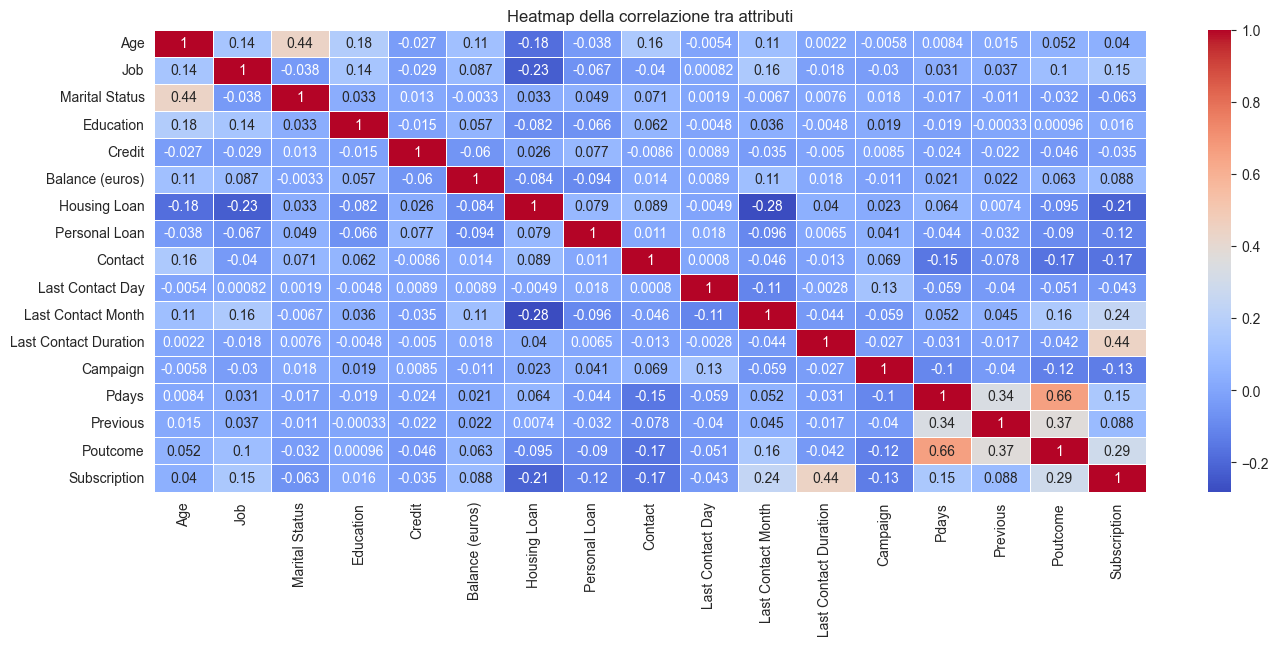

In [11]:
# Calcolare la matrice di correlazione
corr_matrix = df_class.corr()

# Creare una heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap della correlazione tra attributi')
plt.show()

In [12]:
# Normalizzazione del dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = scaler.fit_transform(df_class)

df_norm = pd.DataFrame(df_norm, columns=df_class.columns)

# Train test Split
20% test e 80% train


In [14]:
from sklearn.model_selection import train_test_split

# Divisione dei dati in set di addestramento e di test estraendo come etichett ei valori della colonna Subscription

X_train, X_test, y_train, y_test = train_test_split(df_norm.drop('Subscription', axis=1), df_norm['Subscription'], test_size=0.2, random_state=42)

# Addestramento e test dei vari modelli

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Creazione delle istanze dei modelli
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
ada_boost = AdaBoostClassifier(algorithm="SAMME", random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
linear_discriminant_analysis = LinearDiscriminantAnalysis()

# Lista dei modelli
modelli = [logistic_regression, decision_tree, svc, random_forest, ada_boost, gradient_boosting, linear_discriminant_analysis]

# Iterare l'addestramento e il test dei modelli
for modello in modelli:
    
    modello.fit(X_train, y_train)
    previsioni = modello.predict(X_test)
    accuracy = accuracy_score(y_test, previsioni)
    print(f"Accuratezza del modello {type(modello).__name__}: {accuracy}")


Accuratezza del modello LogisticRegression: 0.8147448015122873
Accuratezza del modello DecisionTreeClassifier: 0.7944234404536862
Accuratezza del modello SVC: 0.832703213610586
Accuratezza del modello RandomForestClassifier: 0.8501890359168242
Accuratezza del modello AdaBoostClassifier: 0.8123818525519849
Accuratezza del modello GradientBoostingClassifier: 0.8388468809073724
Accuratezza del modello LinearDiscriminantAnalysis: 0.8081285444234405


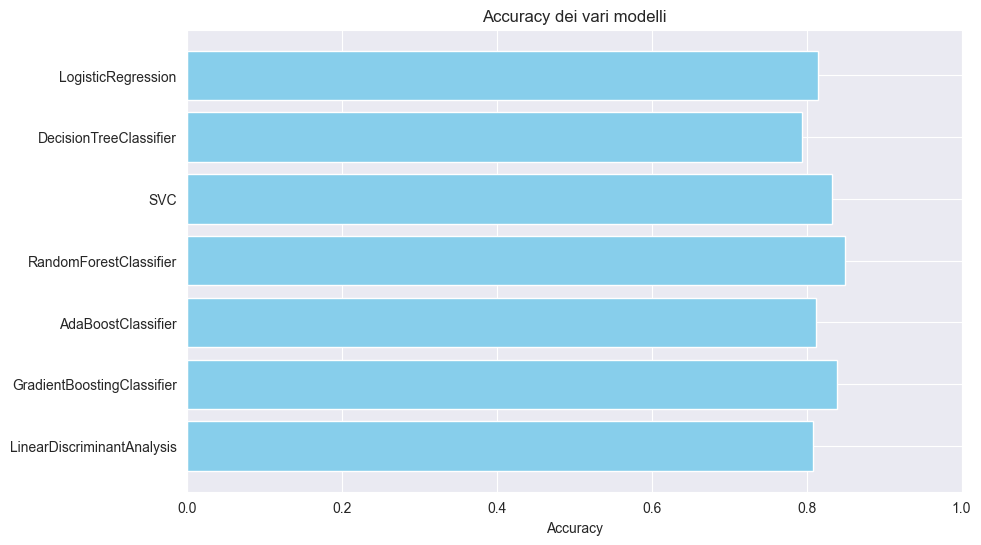

In [22]:
# Liste per memorizzare i nomi dei modelli e le rispettive accuratezze
nomi_modelli = []
accuratezze = []

for modello in modelli:
    previsioni = modello.predict(X_test)
    accuracy = accuracy_score(y_test, previsioni)
    nomi_modelli.append(type(modello).__name__)
    accuratezze.append(accuracy)

# Grafico delle accuratezze
plt.figure(figsize=(10, 6))
plt.barh(nomi_modelli, accuratezze, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy dei vari modelli')
plt.xlim(0, 1)  # Impostare i limiti dell'asse x da 0 a 1
plt.gca().invert_yaxis()  # Invertire l'asse y per avere i nomi dei modelli dall'alto verso il basso
plt.show()


I migliori sono SVC, RandomForestClassifier e GradientBoostingClassifier

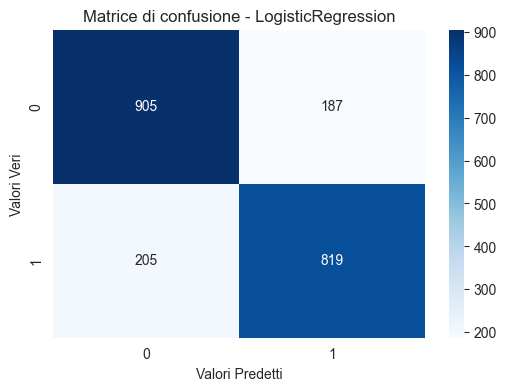

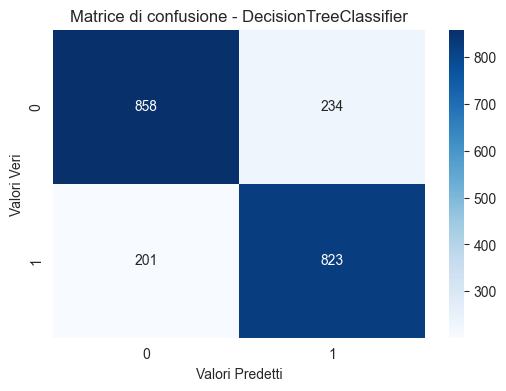

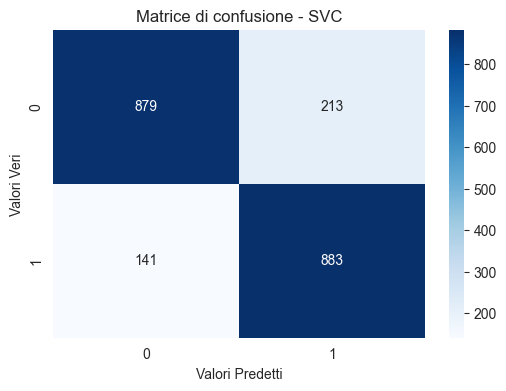

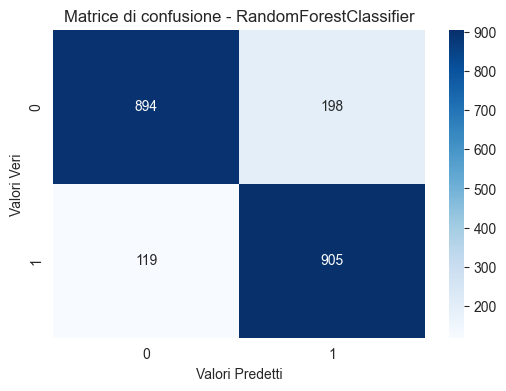

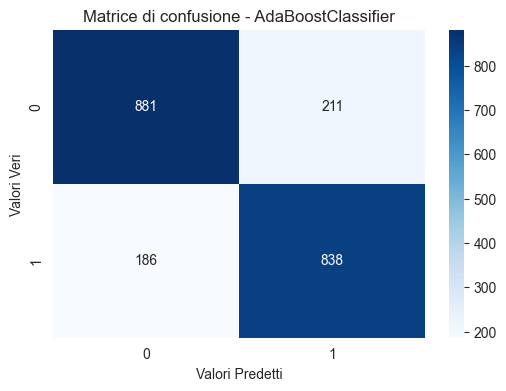

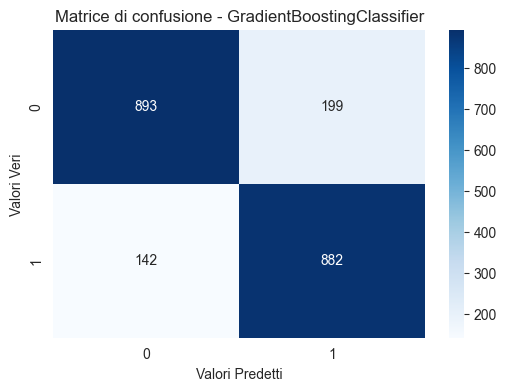

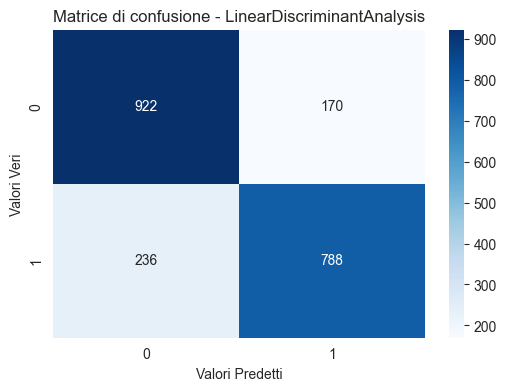

In [23]:
from sklearn.metrics import confusion_matrix

for modello in modelli:
    previsioni = modello.predict(X_test)
    cm = confusion_matrix(y_test, previsioni)
    
    # Matrice di confusione per ogni modello
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Valori Predetti')
    plt.ylabel('Valori Veri')
    plt.title(f'Matrice di confusione - {type(modello).__name__}')
    plt.show()

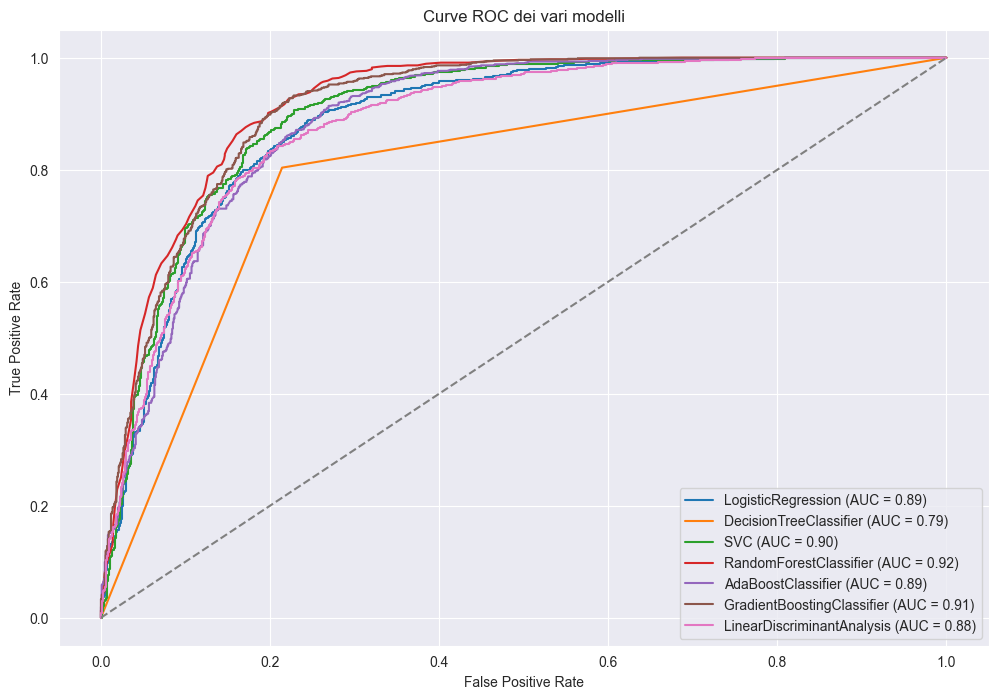

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for modello in modelli:    
    # Calcolare la distanza dal margine di decisione
    if hasattr(modello, "decision_function"):
        probabilita_previste = modello.decision_function(X_test)
    else:
        probabilita_previste = modello.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, probabilita_previste)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{type(modello).__name__} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.title('Curve ROC dei vari modelli')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Correlazioni tra le predizioni dei vari modelli

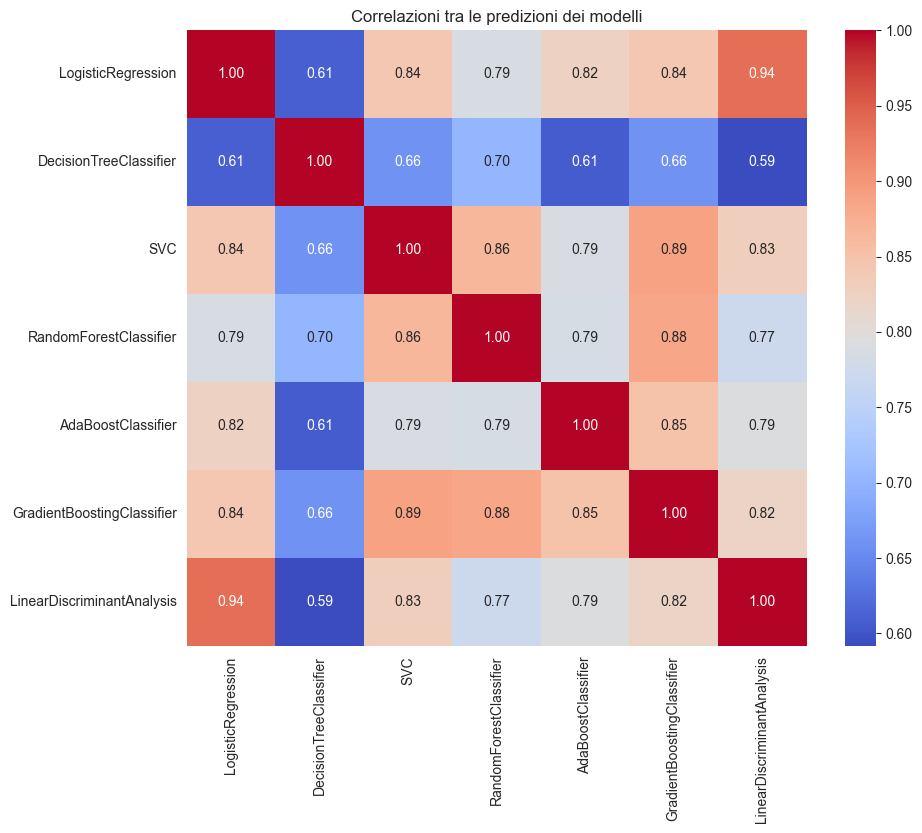

In [20]:
nomi_modelli = [type(modello).__name__ for modello in modelli]

predizioni_df = pd.DataFrame(columns=nomi_modelli)

for modello, nome_modello in zip(modelli, nomi_modelli):
    #modello.fit(X_train, y_train)
    predizioni = modello.predict(X_test)
    predizioni_df[nome_modello] = predizioni

correlazioni = predizioni_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlazioni, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlazioni tra le predizioni dei modelli')
plt.show()


# GridSearch per cercare le migliori combinazioni di parametri per i migliori modelli

In [24]:
from sklearn.model_selection import GridSearchCV

parametri_svc = {
    'C': [0.1, 1, 10], 
    'gamma': [0.01, 0.1, 1], 
    'kernel': ['linear', 'rbf']
}
parametri_random_forest = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['log2', 'sqrt']
}
parametri_gradient_boost = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.1, 0.5, 0.01], 
    'max_depth': [2, 3, 4]
}

parametri = {'SVC': (SVC(random_state=42), parametri_svc),
             'RandomForestClassifier': (RandomForestClassifier(random_state=42), parametri_random_forest),
             'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), parametri_gradient_boost)}

risultati_gridsearch = {}
for nome_modello, (modello, parametri_modello) in parametri.items():
    gs = GridSearchCV(modello, parametri_modello, cv=3, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)
    risultati_gridsearch[nome_modello] = gs

for nome_modello, gs in risultati_gridsearch.items():
    print(f"Migliori parametri per {nome_modello}: {gs.best_params_}")
    print(f"Miglior punteggio per {nome_modello}: {gs.best_score_}")


Migliori parametri per SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Miglior punteggio per SVC: 0.8288826288483118
Migliori parametri per RandomForestClassifier: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
Miglior punteggio per RandomForestClassifier: 0.8519271622909236
Migliori parametri per GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}
Miglior punteggio per GradientBoostingClassifier: 0.8515729713739323


In [25]:
migliori_modelli = {
    'SVC': risultati_gridsearch['SVC'].best_estimator_,
    'RandomForestClassifier': risultati_gridsearch['RandomForestClassifier'].best_estimator_,
    'GradientBoostingClassifier': risultati_gridsearch['GradientBoostingClassifier'].best_estimator_
}

accuratezze_test = {}
for nome_modello, modello in migliori_modelli.items():
    previsioni_test = modello.predict(X_test)
    accuratezza = accuracy_score(y_test, previsioni_test)
    accuratezze_test[nome_modello] = accuratezza

for nome_modello, accuratezza in accuratezze_test.items():
    print(f"Accuratezza del modello {nome_modello} sui dati di test: {accuratezza}")


Accuratezza del modello SVC sui dati di test: 0.831758034026465
Accuratezza del modello RandomForestClassifier sui dati di test: 0.8501890359168242
Accuratezza del modello GradientBoostingClassifier sui dati di test: 0.8497164461247637


# Creazione modello ensemble
Creazione di un modello ensemble composto dai migliori modelli ottenuti con la GridSearch

In [26]:
from sklearn.ensemble import VotingClassifier

modello_ensemble = VotingClassifier(estimators=list(migliori_modelli.items()), voting='hard')
modello_ensemble.fit(X_train, y_train)
accuratezza_test_ensemble = modello_ensemble.score(X_test, y_test)

print(f"Accuratezza del modello ensemble sui dati di test: {accuratezza_test_ensemble}")


Accuratezza del modello ensemble sui dati di test: 0.8468809073724007


L'accuratezza ottenuta è minore di quella del solo gradient boost o del solo random forest ma più affidabile poichè utilizziamo più classificatori.

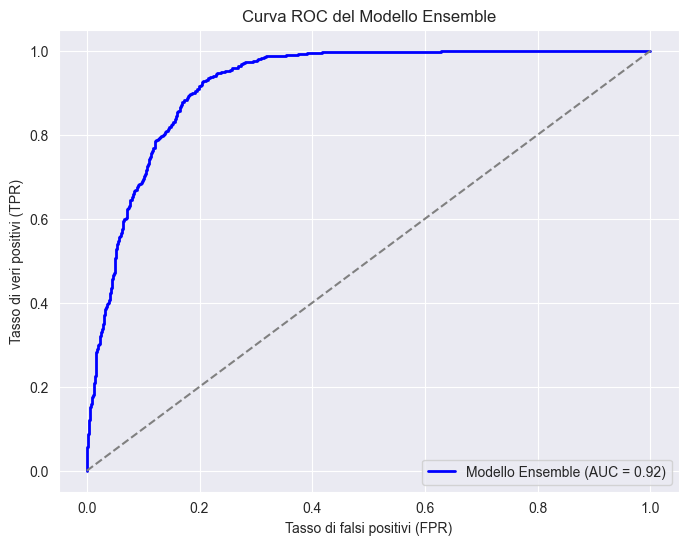

In [29]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve, roc_auc_score

calibrated_svc = CalibratedClassifierCV(modello_ensemble.estimators_[0], method='sigmoid', cv='prefit')
calibrated_svc.fit(X_train, y_train)

probabilita_predette_svc = calibrated_svc.predict_proba(X_test)[:, 1]

probabilita_predette_componenti = np.zeros((len(X_test), 2))
probabilita_predette_componenti[:, 0] += probabilita_predette_svc
for modello in modello_ensemble.estimators_[1:]:
    probabilita_predette_componenti += modello.predict_proba(X_test)

probabilita_predette_ensemble = probabilita_predette_componenti / len(modello_ensemble.estimators_)

fpr, tpr, soglie = roc_curve(y_test, probabilita_predette_ensemble[:, 1])

auc = roc_auc_score(y_test, probabilita_predette_ensemble[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Modello Ensemble (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasso di falsi positivi (FPR)')
plt.ylabel('Tasso di veri positivi (TPR)')
plt.title('Curva ROC del Modello Ensemble')
plt.legend(loc='lower right')
plt.show()



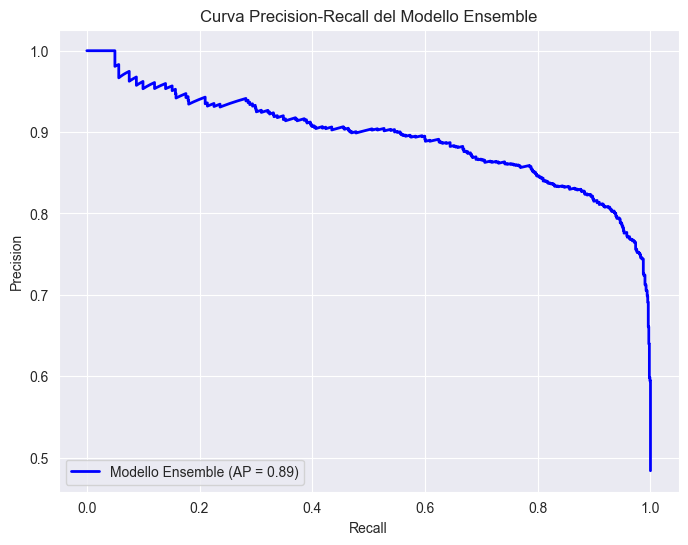

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, probabilita_predette_ensemble[:, 1])

average_precision = average_precision_score(y_test, probabilita_predette_ensemble[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Modello Ensemble (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall del Modello Ensemble')
plt.legend(loc='lower left')
plt.show()


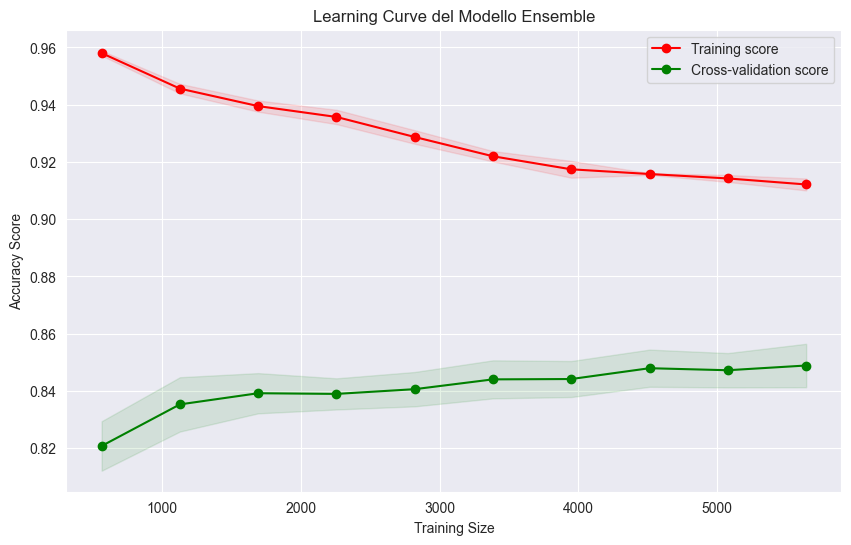

In [31]:
from sklearn.model_selection import learning_curve

dimensioni_addestramento, punteggi_addestramento, punteggi_test = learning_curve(
    modello_ensemble, X_train, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

media_punteggi_addestramento = np.mean(punteggi_addestramento, axis=1)
std_punteggi_addestramento = np.std(punteggi_addestramento, axis=1)
media_punteggi_test = np.mean(punteggi_test, axis=1)
std_punteggi_test = np.std(punteggi_test, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(dimensioni_addestramento, media_punteggi_addestramento, 'o-', color='r', label='Training score')
plt.plot(dimensioni_addestramento, media_punteggi_test, 'o-', color='g', label='Cross-validation score')
plt.fill_between(dimensioni_addestramento, media_punteggi_addestramento - std_punteggi_addestramento,
                 media_punteggi_addestramento + std_punteggi_addestramento, alpha=0.1, color='r')
plt.fill_between(dimensioni_addestramento, media_punteggi_test - std_punteggi_test,
                 media_punteggi_test + std_punteggi_test, alpha=0.1, color='g')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve del Modello Ensemble')
plt.legend(loc='best')
plt.grid(True)
plt.show()
